In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car=pd.read_csv('car_price.csv')

In [3]:
car.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


Data Preprocessing

In [4]:
car = car.drop(['engine','Seats'], axis=1)


In [5]:

car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [6]:
car=car[car['car_prices_in_rupee']!='Ask For Price']

In [7]:
car = pd.DataFrame(car)
# Function to convert car prices
def convert(car_prices_in_rupee):
    if isinstance(car_prices_in_rupee, str) and 'Lakh' in car_prices_in_rupee:
        return float(car_prices_in_rupee.replace(' Lakh', '')) * 100000
    elif isinstance(car_prices_in_rupee, str) and 'Crore' in car_prices_in_rupee:
        return float(car_prices_in_rupee.replace(' Crore', '')) * 10000000
    else:
        return car_prices_in_rupee
# Applying the conversion function to the 'car_prices_in_rupee' column
car['car_prices_in_rupee'] = car['car_prices_in_rupee'].apply(convert)

In [8]:
car['car_prices_in_rupee'] = car['car_prices_in_rupee'].apply(lambda x: str(x).replace(',', '').strip())
car['car_prices_in_rupee']=car['car_prices_in_rupee'].astype(float)


In [9]:
car['car_prices_in_rupee']=car['car_prices_in_rupee'].astype(float)

In [10]:
car['kms_driven']=car['kms_driven'].astype(int)

In [11]:
car=car[~car['fuel_type'].isna()]

In [12]:
car['car_name']=car['car_name'].str.split().str.slice(start=0,stop=4).str.join(' ')

In [13]:
car['Company'] = car['car_name'].apply(lambda x: x.split()[0])

In [14]:
car['car_name'] = car['car_name'].apply(lambda x: ' '.join(x.split()[1:]))

In [15]:
car.rename(columns={'manufacture': 'manufacturing_year'}, inplace=True)

In [16]:
# Reordering columns to place 'Company' before 'car_name'
columns = [ 'Company', 'car_name', 'car_prices_in_rupee', 'kms_driven', 'fuel_type', 'transmission', 'ownership', 'manufacturing_year']
car = car[columns]

In [17]:
car['Company'] = car['Company'].replace('Land', 'LandRover')
car['Company'] = car['Company'].replace('Maruti', 'MarutiSuzuki')
car['car_name'] = car['car_name'].replace('Range Rover', 'Range_Rover')

In [18]:
car.to_csv('Car_price_Cleaned.csv')

In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              5512 non-null   object 
 1   car_name             5512 non-null   object 
 2   car_prices_in_rupee  5512 non-null   float64
 3   kms_driven           5512 non-null   int64  
 4   fuel_type            5512 non-null   object 
 5   transmission         5512 non-null   object 
 6   ownership            5512 non-null   object 
 7   manufacturing_year   5512 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 344.6+ KB


Box plot between various years of cars

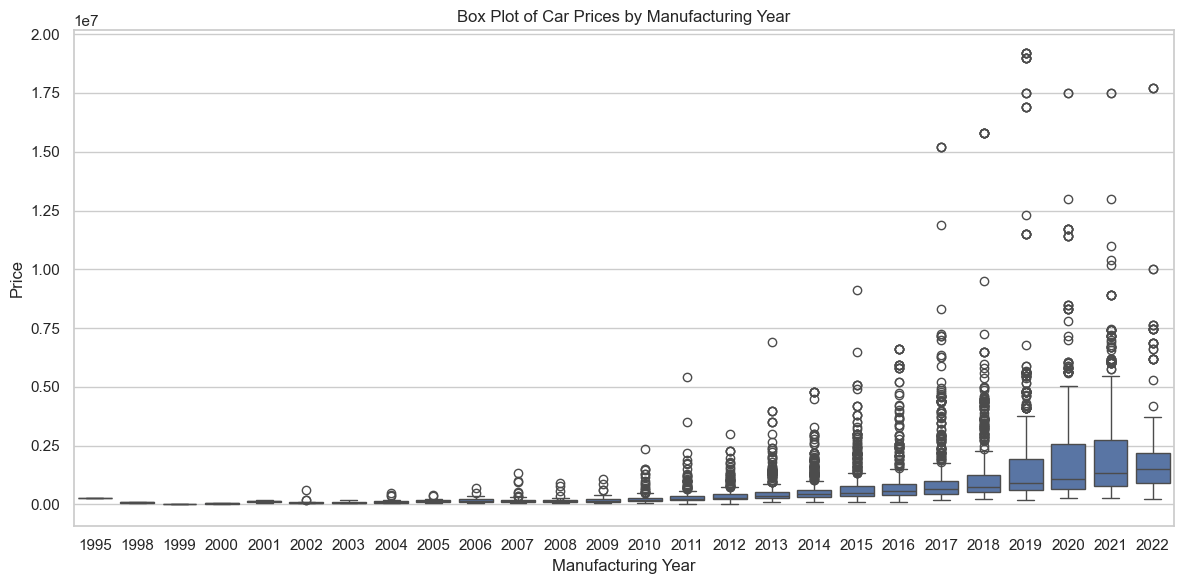

In [20]:

# Set the style
sns.set(style='whitegrid')

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturing_year', y='car_prices_in_rupee', data=car)

plt.title('Box Plot of Car Prices by Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price')

# Show the plot
plt.tight_layout()
plt.show()

### Checking relationship of Company with Price

In [21]:
car['Company'].unique()

array(['Jeep', 'Renault', 'Toyota', 'Honda', 'Volkswagen', 'MarutiSuzuki',
       'Mahindra', 'Hyundai', 'Nissan', 'Kia', 'MG', 'Tata', 'BMW',
       'Mercedes-Benz', 'Datsun', 'Volvo', 'Audi', 'Porsche', 'Ford',
       'Chevrolet', 'Skoda', 'Lexus', 'LandRover', 'Mini', 'Jaguar',
       'Mitsubishi', 'Force', 'Premier', 'Fiat', 'Maserati', 'Bentley',
       'Isuzu'], dtype=object)

### Applying Train Test Split

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [23]:
X=car[['Company','car_name','kms_driven','fuel_type','transmission','ownership','manufacturing_year']]
y=car['car_prices_in_rupee']

In [24]:
X['car_age'] = 2024 - X['manufacturing_year']

# Log transformation for the target variable
y_log = np.log1p(y)

# Defining categorical and numerical features
categorical_features = ['Company', 'car_name', 'fuel_type', 'transmission', 'ownership']
numerical_features = ['kms_driven', 'car_age']

# Create ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numerical_features),
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [25]:
X = X.drop('manufacturing_year', axis=1)

In [26]:
X

,Company,car_name,kms_driven,fuel_type,transmission,ownership,car_age
0,Jeep,Compass 2.0 Longitude,86226,Diesel,Manual,1st Owner,7
1,Renault,Duster RXZ Turbo,13248,Petrol,Automatic,1st Owner,3
2,Toyota,Camry 2.5 G,60343,Petrol,Automatic,1st Owner,8
3,Honda,Jazz VX CVT,26696,Petrol,Automatic,1st Owner,6
4,Volkswagen,Polo 1.2 MPI,69414,Petrol,Manual,1st Owner,8
...,...,...,...,...,...,...,...
5507,BMW,X1 sDrive 20d,45000,Diesel,Automatic,1st Owner,6
5508,BMW,M Series M4,29000,Petrol,Automatic,2nd Owner,9
5509,Jaguar,XF 2.2 Litre,90000,Diesel,Automatic,2nd Owner,11
5510,BMW,7 Series 730Ld,79000,Diesel,Automatic,3rd Owner,9


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [28]:
std = StandardScaler()
std.fit(X[['kms_driven','car_age']])

StandardScaler()

In [29]:
ohe=OneHotEncoder()
ohe.fit(X[['Company','car_name','fuel_type','transmission','ownership']])

OneHotEncoder()

Model Comparison

In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
# Define hyperparameter grids for each model
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20]
}

param_grid_gb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
}

param_grid_dt = {
    'model__max_depth': [5, 10, 20]
}

param_grid_svr = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf']
}


# List of models and corresponding hyperparameter grids
models = [
    ('RandomForest', RandomForestRegressor(), param_grid_rf),
    ('GradientBoosting', GradientBoostingRegressor(), param_grid_gb),
    ('DecisionTree', DecisionTreeRegressor(), param_grid_dt),
    ('SVR', SVR(), param_grid_svr),
    
]

# Create a dictionary to store the results
results = {}
# Cross-validation configuration
kf = 5  # K-folds for cross-validation

# Loop through each model, create pipeline, perform GridSearchCV, and store results
for model_name, model, param_grid in models:
    # Create pipeline for the model
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(pipe, param_grid, cv=kf, scoring='r2')
    
    # Fit the grid search
    grid.fit(X_train, y_train)
    
    # Store best params and score
    results[model_name] = {
        'Best Params': grid.best_params_,
        'Best Score': grid.best_score_
    }

# Print results for all models
for model_name, result in results.items():
    print(f"{model_name} - Best Params: {result['Best Params']}, Best Score: {result['Best Score']}")


RandomForest - Best Params: {'model__max_depth': 20, 'model__n_estimators': 200}, Best Score: 0.9106958643162807
GradientBoosting - Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}, Best Score: 0.9119239752006967
DecisionTree - Best Params: {'model__max_depth': 20}, Best Score: 0.8763052054415461
SVR - Best Params: {'model__C': 10, 'model__kernel': 'rbf'}, Best Score: 0.9386727606214553


In [32]:
# List of models and corresponding hyperparameter grids
models = [
    ('RandomForest', RandomForestRegressor(), param_grid_rf),
    ('GradientBoosting', GradientBoostingRegressor(), param_grid_gb),
    ('DecisionTree', DecisionTreeRegressor(), param_grid_dt),
    ('SVR', SVR(), param_grid_svr)
]

# List to collect results
results_list = []

# Loop through each model, create pipeline, perform GridSearchCV, and calculate evaluation metrics
for model_name, model, param_grid in models:
    # Create pipeline for the model
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(pipe, param_grid, cv=kf, scoring='r2')
    
    # Fit the grid search
    grid.fit(X_train, y_train)
    
    # Best estimator (pipeline with the best model)
    best_model = grid.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mbd = np.mean(y_test - y_pred)
    
    # Append results to list
    results_list.append({
        'Model': model_name,
        'Best Params': grid.best_params_,
        'R²': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'EXVS': explained_var,
        'MAPE': mape,
        'MBD': mbd
    })

# Create a DataFrame for the results
results_df = pd.DataFrame(results_list)

# Display the results as a table
print(results_df)

              Model                                        Best Params  \
0      RandomForest  {'model__max_depth': 20, 'model__n_estimators'...   
1  GradientBoosting  {'model__learning_rate': 0.1, 'model__max_dept...   
2      DecisionTree                           {'model__max_depth': 20}   
3               SVR           {'model__C': 10, 'model__kernel': 'rbf'}   

         R²       MSE      RMSE       MAE      EXVS      MAPE       MBD  
0  0.910851  0.093819  0.306300  0.218113  0.910888  1.656800  0.006239  
1  0.908042  0.096776  0.311088  0.237827  0.908059  1.792898  0.004156  
2  0.878084  0.128304  0.358195  0.245147  0.878251  1.868527  0.013265  
3  0.939872  0.063279  0.251553  0.169674  0.939873  1.294400 -0.001359  


In [33]:
best_params = { 'n_estimators': 200,'learning_rate': 0.5,'max_depth': 5}

# Create the SVR pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Your preprocessing steps
    ('model', GradientBoostingRegressor(**best_params))  #GradientBoostingRegressor  model with the best parameters
])

# Fit the model (ensure this step is executed)
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['kms_driven', 'car_age']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company', 'car_name',
                                                   'fuel_type', 'transmission',
                                                   'ownership'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.5, max_depth=5,
                                           n_estimators=200))])

In [34]:
# Example input data (replace with actual values)
new_data = {
    'Company': ['Volkswagen'],
    'car_name': ['Polo 1.2 MPI'],
    'kms_driven': [69414],
    'fuel_type': ['Petrol'],
    'transmission': ['Manual'],
    'ownership': ['1st Owner'],
    'car_age': [8]
}

# Create DataFrame
input_df = pd.DataFrame(new_data)

In [35]:
# Select only the relevant columns (X features) in the same order as the training data
input_features = input_df[['Company', 'car_name', 'kms_driven', 'fuel_type', 'transmission', 'ownership', 'car_age']]

# Make predictions
predicted_log_price = gb_pipeline.predict(input_features)

# Reverse the log transformation
predicted_price = np.expm1(predicted_log_price)

# Output the predicted price
print(f'Predicted car price in Rupee: {predicted_price}')

Predicted car price in Rupee: [455533.76770104]


In [36]:
y_pred_log = gb_pipeline.predict(X_test)

# Inverse log transformation to get original scale predictions
y_pred = np.expm1(y_pred_log)

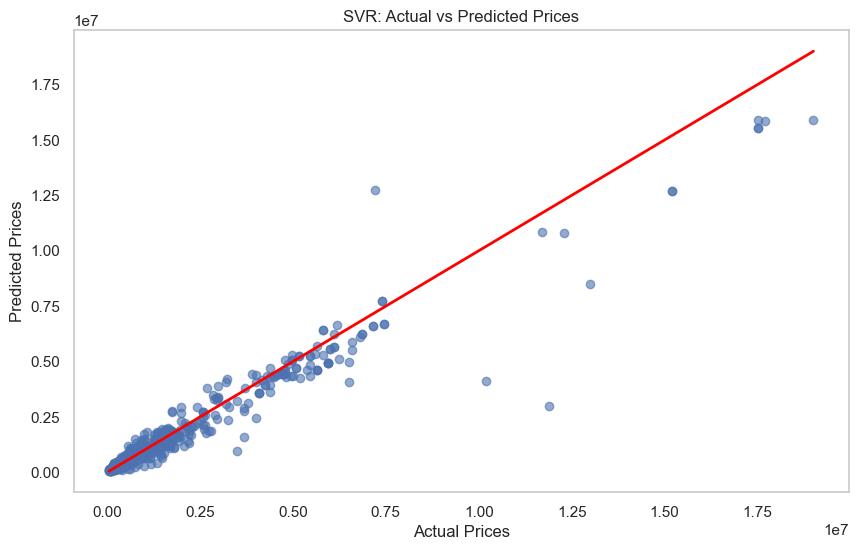

In [37]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test), y_pred, alpha=0.6)
plt.plot([min(np.expm1(y_test)), max(np.expm1(y_test))], 
         [min(np.expm1(y_test)), max(np.expm1(y_test))], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR: Actual vs Predicted Prices')
plt.grid()
plt.show()



In [38]:
import pickle

In [39]:
pickle.dump(pipe,open('GredientBoostingRegressionModel.pkl','wb'))